# Life Cycle Assessment of an inductor
*Written by Félix Pollet, ISAE-Supaéro, France*

The objective of this notebook is to conduct a life cycle assessment (LCA) on the inductor to evaluate its environmental impact over several categories such as climate change and depletion of material resources, among others.

In a second step, you will re-run the optimization process from notebook [06_SizingCodeInductor](06_SizingCodeInductor.ipynb) with an environmental objective function instead of a mass minimization objective, and observe the changes in the design.

## 1. Scope definition of the LCA

The first step in conducting an LCA is to define the scope of the study. We have to clearly state :
* The goal of the study, here it is to evaluate the environmental impacts of the inductor and minimize these impacts by resizing the inductor.
* The functional unit, which represents a quantified description of the system and its performance.
* The boundaries of the system, i.e. what is covered by the study and what is not.
* Any other valuable information or assumption.

Once the scope has been defined, you may build a process tree, which is a hierarchical representation of the materials and energy required to fulfill the functional unit.

```{exercise} Scope definition
:label: ex1

Provide a definition for the functional unit of the inductor and the boundaries of the system. Build the associated process tree.

```

````{solution} ex1
:label: sol1
:class: dropdown

Here is one solution:

* **Functional unit**: Limit the current ripple in the DC/DC converter for a lifetime service of $T_{use} = 5 \times 365 \times 8$ hours. The corresponding distance is equal to $D_{use} = 300,000$ km.
* **Boundaries of the system**: The LCA focuses on the inductor itself, including its manufacturing and the joule losses that occur during its operation. We also consider the energy lost through friction at the bus level that is attributable to the mass of the inductor.
* **Additional assumptions**: The end-of-life impacts are not covered due to the lack of data.

**Process tree**
```{figure} https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/Mermaid_LCA.svg
:width: 700px
:align: center
```

````

## 2. Data for the LCA

Collecting data for a Life Cycle Inventory can be a time-consuming process. In this study, we will rely on a pre-existing database that directly provides the impacts associated with the production of the coil and the ferromagnetic core. This includes the entire production chain, from raw material extraction to the final product, including transportation from one site to another. In addition, the database provides the environmental impacts resulting from the production of 1 kWh of electricity, using the French electricity mix. This is useful to take into account the impact of energy losses.


```{exercise} Get familiar with LCA data
:label: ex2
The following lines import the databases and display the data over 16 impact categories, including climate change, particulate matter formation, and material resources depletion.

Beware, the impacts are provided for 1 kg of final product, or, for the electricity, 1 kWh of electricity production.

Have a first look at the impacts generated by the production of each component. Be curious about what represent each impact.
```

Supplementary information on the impact categories: 

```{figure} https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/impact_categories_1.JPG
:width: 700px
:align: center
```

```{figure} https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/impact_categories_2.JPG
:width: 700px
:align: center
```

[Source: Understanding Product Environmental Footprint and Organisation Environmental Footprint methods](https://op.europa.eu/en/publication-detail/-/publication/c43b9684-4521-11ed-92ed-01aa75ed71a1/language-en)


In [1]:
# Import libraries
import pandas as pd
from IPython import display as ICD
import importlib

# Path to the database
database_path = 'https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/lca_inductance.xlsx'

# Read LCA data for each "background" data of the process tree
df_copper = pd.read_excel(database_path, sheet_name='Copper wire (1 kg)')
df_ferrite = pd.read_excel(database_path, sheet_name='Ferrite (1 kg)')
df_electricity = pd.read_excel(database_path, sheet_name='Electricity France (1 kWh)')

# Display LCA results for each "background" data
print("LCA for the production of 1 kg of copper"); ICD.display(df_copper)
print("LCA for the production of 1 kg of ferrite"); ICD.display(df_ferrite)
print("LCA for the production of 1 kWh of electricity (France)"); ICD.display(df_electricity)

LCA for the production of 1 kg of copper


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),5.816810e-01,mol H+-Eq
1,climate change,global warming potential (GWP100),7.433720e+00,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),6.632250e+02,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,9.333420e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,4.579140e-02,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,2.856350e-02,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),3.980400e-01,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),8.789730e-08,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),7.687160e-06,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,8.552100e-01,kBq U235-Eq


LCA for the production of 1 kg of ferrite


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),1.467400e-02,mol H+-Eq
1,climate change,global warming potential (GWP100),2.073400e+00,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),2.390300e+01,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,2.272700e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,8.475800e-04,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,3.329300e-03,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),3.572600e-02,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),9.170400e-08,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),2.892800e-08,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,1.620100e-01,kBq U235-Eq


LCA for the production of 1 kWh of electricity (France)


,Impact category,Indicator,Impact Score,Unit
0,acidification,accumulated exceedance (AE),3.318000e-04,mol H+-Eq
1,climate change,global warming potential (GWP100),7.769200e-02,kg CO2-Eq
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),3.723700e-01,CTUe
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,1.161900e+01,"MJ, net calorific value"
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,1.533300e-05,kg P-Eq
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,9.840600e-05,kg N-Eq
6,eutrophication: terrestrial,accumulated exceedance (AE),7.263700e-04,mol N-Eq
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),4.926400e-11,CTUh
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),1.099000e-09,CTUh
9,ionising radiation: human health,human exposure efficiency relative to u235,5.266300e-01,kBq U235-Eq


## 3. LCA of the sized inductor

### Impacts calculation

Now that we know how much impacts correspond to the production of 1 kg of copper, 1 kg of ferrite pot, and 1 kWh of electricity, the next step is to calculate the total impact of the inductor.

```{exercise} Calculate the impacts for the inductor system
:label: ex3

Using the process tree, calculate the impacts of the inductor by summing the impacts of each subprocess.
```

````{solution} ex3
:label: my-solution
:class: dropdown

```{code-block} python
M_ferrite = 2.88  # [kg] mass of ferrite pots
M_copper = 0.72  # [kg] mass of copper
M_total = M_ferrite + M_copper  # [kg] total mass of the inductor
PJ = 0.055  # [kW] Joules losses

T_use = 5*365*8 # [hrs] life time
D_use = 300000 # [km] corresponding travel distance
Crr = 0.01  # [-] rolling resistance coefficient 
E_PJ = T_use * PJ  # [kWh] Joules losses (energy)
E_fr = M_total * 9.81 * (D_use * 1000) * Crr / 1000 / 3600 # [kWh] Friction losses at bus level due to inductor's mass

```
````

In [2]:
# Values obtained with the sizing code
M_ferrite = 2.88  # [kg]
M_copper = 0.72  # [kg]
M_total = M_ferrite + M_copper  # [kg]
PJ = 0.055  # [kW]

# Parameters for the life cycle assessment
T_use = 5*365*8 # [hrs] lifetime service
D_use = 300000 # [km] corresponding travel distance
Crr = 0.01  # [-] rolling resistance coefficient  
E_J = T_use * PJ  # [kWh] Joules losses
E_fr = M_total * 9.81 * (D_use * 1000) * Crr / 1000 / 3600 # [kWh] Friction losses at bus level due to inductor's mass

# Create a dictionary to store the LCA database of each component and the corresponding sizing parameters
dataframes_and_params = {
    'Copper wire (1 kg)': {'df': df_copper, 'param': M_copper},
    'Ferrite core (1 kg)': {'df': df_ferrite, 'param': M_ferrite},
    'Joules losses': {'df': df_electricity, 'param': E_J},
    'Friction losses': {'df': df_electricity, 'param': E_fr}
}

# Create an empty DataFrame to store the final results
result_df = pd.DataFrame(columns=["Impact category", "Indicator", "Unit"])

# Populate the result DataFrame with the impacts of each component
for component, data in dataframes_and_params.items():
    df = data['df'].copy()
    param = data['param']
    
    # Multiply the "Impact Score" by the parameter
    df['Impact Score'] *= param
    
    # Rename the "Impact Score" column to include the name of the corresponding component
    df.rename(columns={'Impact Score': f'Impact Score ({component.split()[0]})'}, inplace=True)
    
    # Merge the DataFrames based on the common columns
    result_df = pd.merge(result_df, df, how='outer', on=["Impact category", "Indicator", "Unit"])

# Calculate the total impact score by aggregating the impacts of each component
result_df['Impact Score (Total)'] = result_df.filter(like='Impact Score').sum(axis=1)

# Display the results
result_df

,Impact category,Indicator,Impact Score (Copper),Unit,Impact Score (Ferrite),Impact Score (Joules),Impact Score (Friction),Impact Score (Total)
0,acidification,accumulated exceedance (AE),4.188103e-01,mol H+-Eq,4.226112e-02,2.664354e-01,9.764874e-03,7.372717e-01
1,climate change,global warming potential (GWP100),5.352278e+00,kg CO2-Eq,5.971392e+00,6.238668e+01,2.286476e+00,7.599682e+01
2,ecotoxicity: freshwater,comparative toxic unit for ecosystems (CTUe),4.775220e+02,CTUe,6.884064e+01,2.990131e+02,1.095885e+01,8.563346e+02
3,energy resources: non-renewable,abiotic depletion potential (ADP): fossil fuels,6.720062e+01,"MJ, net calorific value",6.545376e+01,9.330057e+03,3.419472e+02,9.804659e+03
4,eutrophication: freshwater,fraction of nutrients reaching freshwater end ...,3.296981e-02,kg P-Eq,2.441030e-03,1.231240e-02,4.512502e-04,4.817449e-02
5,eutrophication: marine,fraction of nutrients reaching marine end comp...,2.056572e-02,kg N-Eq,9.588384e-03,7.902002e-02,2.896089e-03,1.120702e-01
6,eutrophication: terrestrial,accumulated exceedance (AE),2.865888e-01,mol N-Eq,1.028909e-01,5.832751e-01,2.137707e-02,9.941319e-01
7,human toxicity: carcinogenic,comparative toxic unit for human (CTUh),6.328606e-08,CTUh,2.641075e-07,3.955899e-08,1.449840e-09,3.684024e-07
8,human toxicity: non-carcinogenic,comparative toxic unit for human (CTUh),5.534755e-06,CTUh,8.331264e-08,8.824970e-07,3.234357e-08,6.532908e-06
9,ionising radiation: human health,human exposure efficiency relative to u235,6.157512e-01,kBq U235-Eq,4.665888e-01,4.228839e+02,1.549872e+01,4.394650e+02


### Visualization and interpretation
It is now possible to visualize the results over each impact category. 

The following figure provides the results obtained over the impact categories, expressed in the physical units specific to each category.

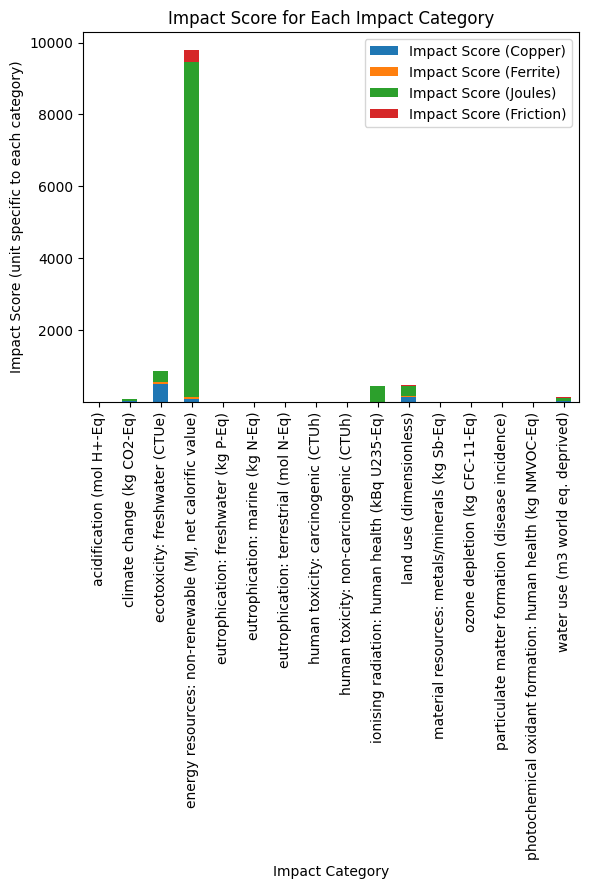

In [3]:
# Plot the LCA results
result_df['XLabels'] = result_df['Impact category'] + ' (' + result_df['Unit'] + ')'
ax = result_df[['Impact Score (Copper)', 'Impact Score (Ferrite)', 'Impact Score (Joules)', 'Impact Score (Friction)']].plot.bar(stacked=True)
ax.set_xticklabels(result_df['XLabels'])
ax.set_xlabel("Impact Category")
ax.set_ylabel("Impact Score (unit specific to each category)")
ax.set_title("Impact Score for Each Impact Category");

It is not easy to read, right? This is because each impact category is expressed with its own unit, so that the values varies highly from one category to another.

What we can do is to have a look at the contributions, in percent, of each component (copper, ferrite and energy losses) across each impact category:

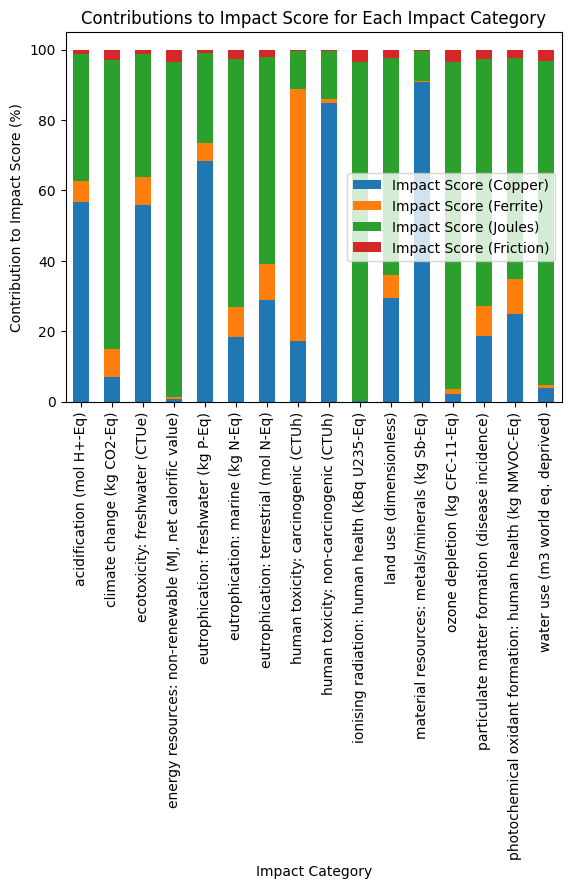

In [4]:
# Contributions
result_df_percent = result_df[['Impact Score (Copper)', 'Impact Score (Ferrite)', 'Impact Score (Joules)', 'Impact Score (Friction)']].apply(lambda x: x*100/sum(x), axis=1)
ax = result_df_percent[['Impact Score (Copper)', 'Impact Score (Ferrite)', 'Impact Score (Joules)', 'Impact Score (Friction)']].plot.bar(stacked=True)
ax.set_xticklabels(result_df['XLabels'])
ax.set_xlabel("Impact Category")
ax.set_ylabel("Contribution to Impact Score (%)")
ax.set_title("Contributions to Impact Score for Each Impact Category");

```{exercise} Contributions
:label: ex4

* For each impact category, what are the main contributors?
* What would you expect if we had to re-size the inductor in order to minimize these impacts?
```


```{exercise} Most relevant impacts?
:label: ex4.2

With the two previous plots, is it possible to compare the different impact categories with each other? Why?
```

````{solution} ex4.2
:class: dropdown

Environmental impact scores in LCA are expressed in different physical units, so it is not possible to compare the different categories directly.

One solution is to *normalize* the impacts with respect to a reference system, so that the results are expressed without unit.

To do so, we have to divide our results by the scores obtained for a reference situation (for example, the total impacts resulting from transportation systems in France, in 2023). This enables to get a standard scale to compare the impacts.

In what follows, we use the normalization factors provided by the [Environmental Footprint method](https://publications.jrc.ec.europa.eu/repository/bitstream/JRC109878/kjna28984enn_global_norm_factors.pdf), which express the average impacts of one european citizen in the year 2010. For example, the normalization factor for the "climate change" category is equal to 8100 kgCO2-eq.

````

In [5]:
# Read the normalization factors from the excel file
normalization_factors_df = pd.read_excel('https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/normalisation_weighting_factors.xlsx', sheet_name='NF SETS')

# Create a copy of the results dataframe and add the normalization factors for each impact category
result_df_normalized = pd.merge(result_df, normalization_factors_df, how='left', on='Impact category')

# Divide each "Impact Score" column by the corresponding normalization factor
for col in [col for col in result_df.columns if 'Impact Score' in col]:
    result_df_normalized[col] /= result_df_normalized['Normalization factor']

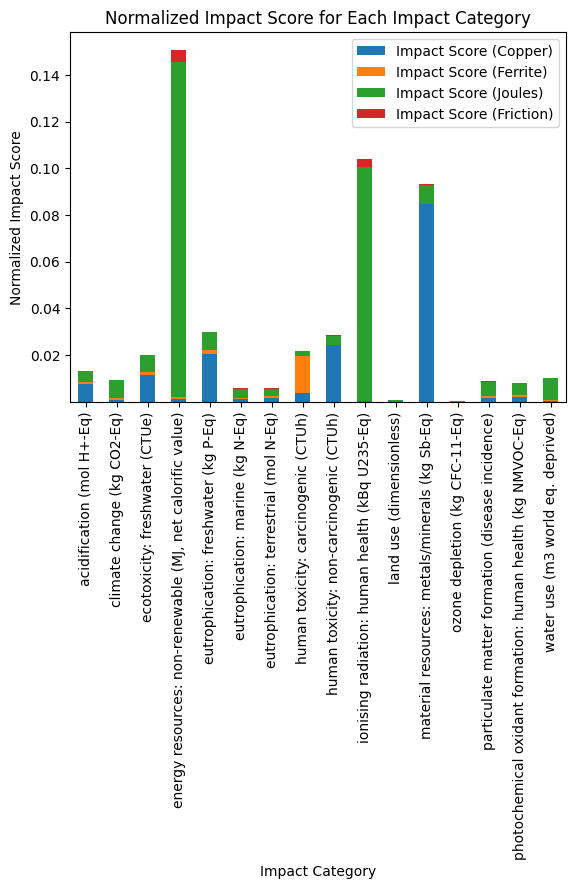

In [6]:
# Plot the LCA results
ax = result_df_normalized[['Impact Score (Copper)', 'Impact Score (Ferrite)', 'Impact Score (Joules)', 'Impact Score (Friction)']].plot.bar(stacked=True)
ax.set_xticklabels(result_df_normalized['XLabels'])
ax.set_xlabel("Impact Category")
ax.set_ylabel("Normalized Impact Score")
ax.set_title("Normalized Impact Score for Each Impact Category");

```{exercise} Interpretation with normalized results
:label: ex5

Have a look at the normalized results. What impact categories are the most relevant? 

```

## 4. Sensitivity analysis

In the first place, we have assumed that the inductor will be used for $T_{use}=14,600$ hours during its lifetime. However, this assumption may be too pessimistic or optimistic. The LCA practitioner must always check the sensitivity of the results to the assumptions to ensure the robustness of the study.


```{exercise} Sensitivity to lifetime assumption
:label: ex5

Re-run the analysis for different assumptions over the inductors's lifetime, for example $T_{use}$ ranging from 10,000 to 20,000 hours.

Do you observe any difference?

```


In the following, we will keep $T_{use}= 5 \times 365 \times 8 = 14,600$ hours.

## 5. Sizing optimization with various environmental objectives

We will now focus on re-sizing the inductor to minimize the environmental impacts instead of the mass.

To do so, we have to change the objective function in the sizing code.

```{exercise} Sizing code modification
:label: ex6

Modify the sizing code to return the environmental impact of the inductor for the requested category.

```

In [7]:
import numpy as np
import scipy
import scipy.optimize
from math import pi, sqrt
import timeit
import pandas as pd

# Specifications
IL_max=150 # [A] max current
IL_RMS=140 # [A] RMS current
L=150e-6 # [H] Inductance
 
# Assumptions
#J=5e6 # [A/m²] Current density
B_mag=0.4 # [T] Induction
k_bob=0.33 # [-] winding coefficient
T_amb=60 # [°C] Support temperature
T_max=150 # [°C] Max temperature

# Physical constants
mu_0=4*3.14e-7 # [SI] permeability

# Reference parameters for scaling laws (Pot core)
D_ref=66.29e-3 # [m] External diameter
H_ref=57.3e-3/2 # [m] 1 half core height
Airon_ref=pi/4*(29.19**2-6.5**2)*1e-6    # [m^2] iron surface
Awind_ref=43.28*(54.51-28.19)/2*1e-6    # [m^2] winding surface
Rmoy_ref=(54.51-28.19)/2*1e-3 # [m] Mean radius for winding
M_ref=225e-3  # [kg] 1 half core mass

# Additional parameters useful for the life cycle assessment
T_use = 5*365*8 # [hrs] lifetime service
D_use = 300000 # [km] corresponding travel distance
Crr = 0.01  # [-] rolling resistance coefficient  

# Database for LCA
database_path = 'https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/lca_inductance.xlsx' # Path to the database
df_copper = pd.read_excel(database_path, sheet_name='Copper wire (1 kg)')
df_ferrite = pd.read_excel(database_path, sheet_name='Ferrite (1 kg)')
df_electricity = pd.read_excel(database_path, sheet_name='Electricity France (1 kWh)')
df_plastic = pd.read_excel(database_path, sheet_name='Plastic body (1 kg)')
normalization_factors_df = pd.read_excel('https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/normalisation_weighting_factors.xlsx', sheet_name='NF SETS')


# -----------------------
# sizing code
# -----------------------
# inputs: 
# - param: optimisation variables vector 
# - arg: selection of output  
# output: 
# - objective if arg='Obj', problem characteristics if arg='Prt', constraints other else

def SizingInductor(param, arg):
    # Variables
    e_D=param[0] # [m] air gap / External diameter
    J=param[1]*1e6 # [A/m²] current density
    
    # Magnetic pi_0
    PI0_m=3.86*e_D**(0.344-0.226*np.log10(e_D)-0.0355*(np.log10(e_D))**2)
    
    # Magnetic energy calculation
    E_mag=1/2*L*IL_max**2 # [J] Energy
    
    D=(E_mag*2*PI0_m*D_ref**4/J**2/k_bob**2/Awind_ref**2/mu_0)**(1/5) # External diameter calculation
          
    # Reluctance and inductance
    RL=PI0_m/mu_0/D  # [] reluctance
    N=np.sqrt(L*RL) # [-] turn number
    
    # Wire section & winding surface
    S_w=IL_RMS/J # [m²] 1 wire section area
    S_bob=N*S_w/k_bob # [m^2] winding surface
  
    # Core scaling
    A_iron=Airon_ref*(D/D_ref)**(2) # [m^2] iron surface
    A_wind=Awind_ref*(D/D_ref)**(2) # [m^2] winding surface
    H=H_ref*(D/D_ref)**(1) # [m] 1 half core height    
    Rmoy=Rmoy_ref*(D/D_ref)**(1) # [m] Mean radius for winding
    
    M_core =M_ref*(D/D_ref)**(3) # [kg] one half core mass

    # Magnetic field
    B=N*IL_max/RL/A_iron # [T]
    
    # Mass
    M_copper=2*pi*Rmoy*N*S_w*7800
    M_total=M_copper+M_core*2
    
    # Temperature calculation
    PI0_t = 0.0786 + 0.524*e_D -2.04*e_D**2 # PI0 thermal
    Rth=PI0_t/(0.5*D) # [K/W] thermal resistance
    
    PJ=J**2*2*pi*Rmoy*N*S_w*1.7e-8 # [W] Joules losses
    
    Teta_hot=T_amb + PJ*Rth # [°C] Hot spot temperature
    
    # Energy losses
    E_PJ = T_use * (PJ / 1000)   # [kWh] Joule losses over the life cycle of the inductor
    E_fr = M_total * 9.81 * Crr * (D_use * 1000) / 1000 / 3600  # [kWh] friction losses (at bus level) due to the inductor's mass
    E_total = E_PJ + E_fr
    
    # Objective and contraints
    if arg=='mass':
        return M_total
    
    elif arg=='energy':
        return E_total / 100  # factor 100 to facilitate optimization convergence (result closer to unity)
    
    elif arg in ["acidification",
                 "climate change",
                 "ecotoxicity: freshwater",
                 "energy resources: non-renewable",
                 "eutrophication: freshwater",
                 "eutrophication: marine",
                 "eutrophication: terrestrial",
                 "human toxicity: carcinogenic",
                 "human toxicity: non-carcinogenic",
                 "ionising radiation: human health",
                 "land use",
                 "material resources: metals/minerals",
                 "ozone depletion",
                 "particulate matter formation",
                 "photochemical oxidant formation: human health",
                 "water use"
                ]:
        # total impact for the requested impact category
        impact_score = (
            M_copper * df_copper[df_copper["Impact category"] == arg]["Impact Score"] +
            2*M_core * df_ferrite[df_ferrite["Impact category"] == arg]["Impact Score"] +
            E_total * df_electricity[df_electricity["Impact category"] == arg]["Impact Score"]
        )
        # Normalize the score (not mandatory but may facilitates optimization because objective value is closer to unity)
        normalization_factor = normalization_factors_df[normalization_factors_df["Impact category"] == arg]["Normalization factor"].values[0]
        normalized_score = impact_score / normalization_factor
        return normalized_score
    
    elif arg=='Prt':
        print("* Optimisation variables:")
        print("           Airgap e/D = %.2g"% (e_D))
        print("           Current density J = %.2g"% (J))
        print("* Components characteristics:")
        print("           Total mass = %.2f kg" % M_total)
        print("           Core (2) mass = %.2f kg" % (2*M_core))
        print("           Coil mass = %.2f kg" % M_copper)
        print("           Core dimensions = %.1f (diameter) x %.1f (heigth) mm"%((D*1e3,2*H*1e3)))
        print("           Airgap e = %.1f mm"%(e_D*D*1e3))
        print("           A_iron = %.0f mm^2"%(A_iron*1e6))
        print("           Number of turns = %i"%(N))
        print("           Joules losses = %.3f kWh" %(E_PJ))
        print("           Friction losses = %.3f kWh" %(E_fr))
        print("           Total energy losses = %.3f kWh" %(E_total))
        print("* Constraints (should be >0):")
        print("           Winding  surface margin = %.3f mm²" % ((A_wind-S_bob)*1e6))
        print("           Induction margin = %.3f T" %((B_mag-B)))
        print("           Temperature margin = %.3f K" %(T_max-Teta_hot))
        
    else:
        return [A_wind-S_bob, B_mag-B, T_max-Teta_hot]

We can now re-run the optimization to size the inductor with respect to different objective functions.

```{exercise} Comparison of objective functions
:label: ex7

Run the optimization with the following objective functions:
- Mass minimization
- Energy losses minimization
- Impact score minimization for each environmental category. 

Store the sizing results (e.g., core mass and coil mass) in the `optimization_dict` object and plot the results.

Are the results always the same? Provide an explanation based on the LCA study carried out earlier.

```

In [8]:
# Optimization variables
e_D=1e-3 # [m] airgap
J=50 # [A/mm²] current density

# Vector of parameters
parameters = np.array((e_D,J))

# Optimization with SLSQP algorithm
contrainte=lambda x: SizingInductor(x, 'Const')
objectif=lambda x: SizingInductor(x, 'mass')  # To modify according to the objective function (e.g., 'climate change')
result = scipy.optimize.fmin_slsqp(func=objectif, x0=parameters, 
                                   bounds=[(1e-3,1e-1),(1,50)],
                                   f_ieqcons=contrainte, iter=100, acc=1e-6)

# Final characteristics after optimization 
print("-----------------------------------------------")
print("Final characteristics after optimization :")

SizingInductor(result, 'Prt')
print("-----------------------------------------------")


Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.605397381022131
            Iterations: 11
            Function evaluations: 34
            Gradient evaluations: 11
-----------------------------------------------
Final characteristics after optimization :
* Optimisation variables:
           Airgap e/D = 0.049
           Current density J = 5.9e+06
* Components characteristics:
           Total mass = 3.61 kg
           Core (2) mass = 2.88 kg
           Coil mass = 0.72 kg
           Core dimensions = 123.1 (diameter) x 106.4 (heigth) mm
           Airgap e = 6.1 mm
           A_iron = 2193 mm^2
           Number of turns = 25
           Joules losses = 812.477 kWh
           Friction losses = 29.474 kWh
           Total energy losses = 841.951 kWh
* Constraints (should be >0):
           Winding  surface margin = 130.921 mm²
           Induction margin = -0.000 T
           Temperature margin = 0.000 K
--------------------------------------

In [9]:
# Record the mass corresponding to the inductor obtained with each optimization objective
optimization_dict = {}
optimization_dict["mass"] = [2.88, 0.72]  # [kg] (core mass, coil mass)
optimization_dict["energy"] = [10.96, 2.76] # [kg]
optimization_dict["acidification"] = [2.88, 0.72]
optimization_dict["climate change"] = [6.20, 1.56]
optimization_dict["ecotoxicity: freshwater"] = [2.88, 0.72]
optimization_dict["energy resources: non-renewable"] = [10.71, 2.69]
optimization_dict["eutrophication: freshwater"] = [2.88, 0.72]
optimization_dict["eutrophication: marine"] = [4.86, 1.22]
optimization_dict["eutrophication: terrestrial"] = [3.99, 1.00]
optimization_dict["human toxicity: carcinogenic"] = [2.88, 0.72]
optimization_dict["human toxicity: non-carcinogenic"] = [2.88, 0.72]
optimization_dict["ionising radiation: human health"] = [10.96, 2.76]
optimization_dict["land use"] = [10.96, 2.76]
optimization_dict["material resources: metals/minerals"] = [2.88, 0.72]
optimization_dict["ozone depletion"] = [10.96, 2.76]
optimization_dict["particulate matter formation"] = [4.82, 1.21]
optimization_dict["photochemical oxidant formation: human health"] = [4.26, 1.07]
optimization_dict["water use"] = [10.95, 2.75]

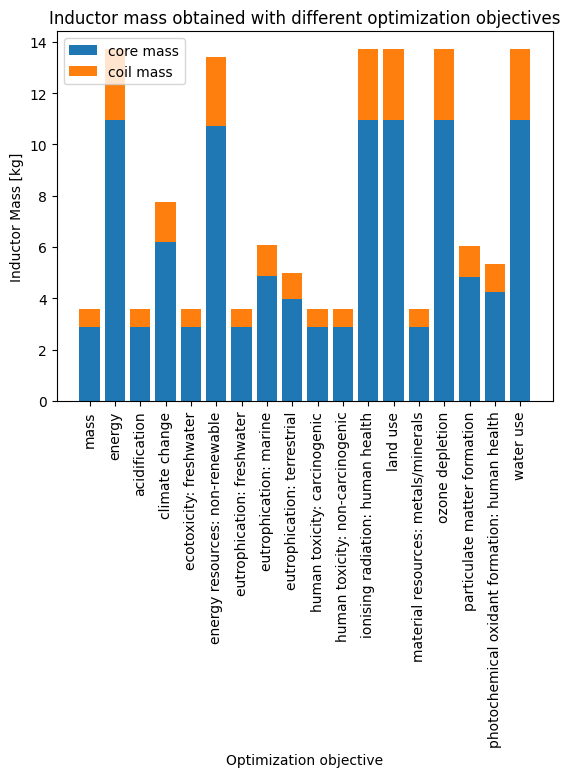

In [10]:
# Plot the sizing results obtained with each optimization objective
import matplotlib.pyplot as plt
optimization_objectives = []
values = []             
for key, val in optimization_dict.items():
    optimization_objectives.append(key)
    values.append(val)
values = np.array(values)

fig, ax = plt.subplots()
ax.bar(range(len(optimization_objectives)), values[:,0], label="core mass")  # Core masses
ax.bar(range(len(optimization_objectives)), values[:,1], bottom=values[:,0], label="coil mass")  # Add coil masses
plt.xticks(range(len(optimization_objectives)), optimization_objectives, rotation='vertical')
ax.set_xlabel('Optimization objective')
ax.set_ylabel('Inductor Mass [kg]')
ax.set_title('Inductor mass obtained with different optimization objectives')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

```{exercise} Design decision
:label: ex8

Propose a strategy to make a decision about which sizing should be used for the inductor. Should we select the inductor with lowest mass? the one that minimizes climate change? ...

```

````{solution} ex8
:class: dropdown

One way to make a environmentally-informed decision would be to select the design that minimizes the most relevant impact categories, as observed with the normalized results.

Recall that two of the most important impact categories were the depletion of non-renewable energy resources and the depletion of metals/minerals. However, minimizing one or the other of these impacts leads to completely different designs for the inductor.

Therefore, we propose here to adopt a multi-objective optimization to find the "best" sizing.

````

## 6. Multi-objective optimization

The multi-objective optimization consists in having a single objective function that is expressed as a weighted sum of all the categories of environmental impact. This results in a single environmental score:

$$ Single~score = \sum_i w_i \cdot {NS}_i$$

where ${NS}_i$ is the normalized score obtained for the i-th impact category (1 = acidification, 2 = climate change, and so on) and $w_i$ is a weighting factor that represents the (subjective) importance accorded to this category.

Similarly to the normalization factors, the *Environmental Footprint method* provides a set of [weighting factors](https://publications.jrc.ec.europa.eu/repository/handle/JRC106545) for each impact category. Note that process for obtaining these weighting factors is rather subjective, as it suppose to rank very different environmental impacts. It can include criteria such as the reversibility of the impacts, the geographic spread of the impact and its time span.

The weighting factors $w_i$ proposed by the Environmental Footprint method are provided in an excel document and displayed below:

In [11]:
# Import weighting factors
weighting_factors_df = pd.read_excel('https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/normalisation_weighting_factors.xlsx', sheet_name='WF SETS')
weighting_factors_df

,Impact category,Weighting factor
0,acidification,0.0620
1,climate change,0.2106
2,ecotoxicity: freshwater,0.0192
3,eutrophication: freshwater,0.0280
4,eutrophication: marine,0.0296
5,eutrophication: terrestrial,0.0371
6,human toxicity: carcinogenic,0.0213
7,human toxicity: non-carcinogenic,0.0184
8,ionising radiation: human health,0.0501
9,land use,0.0794


Now, we have to update the sizing code to calculate and return the single environmental score. The modified code is provided:

In [12]:
import numpy as np
import scipy
import scipy.optimize
from math import pi, sqrt
import timeit
import pandas as pd

# Specifications
IL_max=150 # [A] max current
IL_RMS=140 # [A] RMS current
L=150e-6 # [H] Inductance
 
# Assumptions
#J=5e6 # [A/m²] Current density
B_mag=0.4 # [T] Induction
k_bob=0.33 # [-] winding coefficient
T_amb=60 # [°C] Support temperature
T_max=150 # [°C] Max temperature

# Physical constants
mu_0=4*3.14e-7 # [SI] permeability

# Reference parameters for scaling laws (Pot core)
D_ref=66.29e-3 # [m] External diameter
H_ref=57.3e-3/2 # [m] 1 half core height
Airon_ref=pi/4*(29.19**2-6.5**2)*1e-6    # [m^2] iron surface
Awind_ref=43.28*(54.51-28.19)/2*1e-6    # [m^2] winding surface
Rmoy_ref=(54.51-28.19)/2*1e-3 # [m] Mean radius for winding
M_ref=225e-3  # [kg] 1 half core mass

# Additional parameters useful for the life cycle assessment
T_use = 5*365*8 # [hrs] lifetime service
D_use = 300000 # [km] corresponding travel distance
Crr = 0.01  # [-] rolling resistance coefficient  

# Database for LCA
database_path = 'https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/lca_inductance.xlsx' # Path to the database
df_copper = pd.read_excel(database_path, sheet_name='Copper wire (1 kg)')
df_ferrite = pd.read_excel(database_path, sheet_name='Ferrite (1 kg)')
df_electricity = pd.read_excel(database_path, sheet_name='Electricity France (1 kWh)')
df_plastic = pd.read_excel(database_path, sheet_name='Plastic body (1 kg)')
normalization_factors_df = pd.read_excel('https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/normalisation_weighting_factors.xlsx', sheet_name='NF SETS')
weighting_factors_df = pd.read_excel('https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/data/normalisation_weighting_factors.xlsx', sheet_name='WF SETS')


# -----------------------
# sizing code
# -----------------------
# inputs: 
# - param: optimisation variables vector 
# - arg: selection of output  
# output: 
# - objective if arg='Obj', problem characteristics if arg='Prt', constraints other else

def SizingInductor(param, arg):
    # Variables
    e_D=param[0] # [m] air gap / External diameter
    J=param[1]*1e6 # [A/m²] current density
    
    # Magnetic pi_0
    PI0_m=3.86*e_D**(0.344-0.226*np.log10(e_D)-0.0355*(np.log10(e_D))**2)
    
    # Magnetic energy calculation
    E_mag=1/2*L*IL_max**2 # [J] Energy
    
    D=(E_mag*2*PI0_m*D_ref**4/J**2/k_bob**2/Awind_ref**2/mu_0)**(1/5) # External diameter calculation
          
    # Reluctance and inductance
    RL=PI0_m/mu_0/D  # [] reluctance
    N=np.sqrt(L*RL) # [-] turn number
    
    # Wire section & winding surface
    S_w=IL_RMS/J # [m²] 1 wire section area
    S_bob=N*S_w/k_bob # [m^2] winding surface
  
    # Core scaling
    A_iron=Airon_ref*(D/D_ref)**(2) # [m^2] iron surface
    A_wind=Awind_ref*(D/D_ref)**(2) # [m^2] winding surface
    H=H_ref*(D/D_ref)**(1) # [m] 1 half core height    
    Rmoy=Rmoy_ref*(D/D_ref)**(1) # [m] Mean radius for winding
    
    M_core =M_ref*(D/D_ref)**(3) # [kg] one half core mass

    # Magnetic field
    B=N*IL_max/RL/A_iron # [T]
    
    # Mass
    M_copper=2*pi*Rmoy*N*S_w*7800
    M_total=M_copper+M_core*2
    
    # Temperature calculation
    PI0_t = 0.0786 + 0.524*e_D -2.04*e_D**2 # PI0 thermal
    Rth=PI0_t/(0.5*D) # [K/W] thermal resistance
    
    PJ=J**2*2*pi*Rmoy*N*S_w*1.7e-8 # [W] Joules losses
    
    Teta_hot=T_amb + PJ*Rth # [°C] Hot spot temperature
    
    # Energy losses
    E_PJ = T_use * (PJ / 1000)   # [kWh] Joule losses over the life cycle of the inductor
    E_fr = M_total * 9.81 * Crr * (D_use * 1000) / 1000 / 3600  # [kWh] friction losses (at bus level) due to the inductor's mass
    E_total = E_PJ + E_fr
    
    # Objective and contraints
    if arg=='mass':
        return M_total
    
    elif arg=='energy':
        return E_total / 100  # factor 100 to facilitate optimization convergence (result closer to unity)
    
    elif arg in ["acidification",
                 "climate change",
                 "ecotoxicity: freshwater",
                 "energy resources: non-renewable",
                 "eutrophication: freshwater",
                 "eutrophication: marine",
                 "eutrophication: terrestrial",
                 "human toxicity: carcinogenic",
                 "human toxicity: non-carcinogenic",
                 "ionising radiation: human health",
                 "land use",
                 "material resources: metals/minerals",
                 "ozone depletion",
                 "particulate matter formation",
                 "photochemical oxidant formation: human health",
                 "water use"
                ]:
        # total impact for the requested impact category
        impact_score = (
            M_copper * df_copper[df_copper["Impact category"] == arg]["Impact Score"] +
            2*M_core * df_ferrite[df_ferrite["Impact category"] == arg]["Impact Score"] +
            E_total * df_electricity[df_electricity["Impact category"] == arg]["Impact Score"]
        )
        # Normalize the score (not mandatory but may facilitates optimization because objective value is closer to unity)
        normalization_factor = normalization_factors_df[normalization_factors_df["Impact category"] == arg]["Normalization factor"].values[0]
        normalized_score = impact_score / normalization_factor
        return normalized_score
    
    elif arg == 'ecodesign':  # multi-objective environmental objective
        single_score = 0
        # Calculate the impact for the each impact category
        for impact_category in weighting_factors_df["Impact category"].values:
            impact_score = (
                M_copper * df_copper[df_copper["Impact category"] == impact_category]["Impact Score"] +
                2*M_core * df_ferrite[df_ferrite["Impact category"] == impact_category]["Impact Score"] +
                E_total * df_electricity[df_electricity["Impact category"] == impact_category]["Impact Score"]
            )
            # Normalize then weight the score
            normalization_factor = normalization_factors_df[normalization_factors_df["Impact category"] == impact_category]["Normalization factor"].values[0]
            normalized_score = impact_score / normalization_factor
            weighting_factor = weighting_factors_df[weighting_factors_df["Impact category"] == impact_category]["Weighting factor"].values[0]
            weighted_score = normalized_score.values[0] * weighting_factor
            # Add to the single environmental score
            single_score += weighted_score
        return single_score
    
    elif arg=='Prt':
        print("* Optimisation variables:")
        print("           Airgap e/D = %.2g"% (e_D))
        print("           Current density J = %.2g"% (J))
        print("* Components characteristics:")
        print("           Total mass = %.2f kg" % M_total)
        print("           Core (2) mass = %.2f kg" % (2*M_core))
        print("           Coil mass = %.2f kg" % M_copper)
        print("           Core dimensions = %.1f (diameter) x %.1f (heigth) mm"%((D*1e3,2*H*1e3)))
        print("           Airgap e = %.1f mm"%(e_D*D*1e3))
        print("           A_iron = %.0f mm^2"%(A_iron*1e6))
        print("           Number of turns = %i"%(N))
        print("           Joules losses = %.3f kWh" %(E_PJ))
        print("           Friction losses = %.3f kWh" %(E_fr))
        print("           Total energy losses = %.3f kWh" %(E_total))
        print("* Constraints (should be >0):")
        print("           Winding  surface margin = %.3f mm²" % ((A_wind-S_bob)*1e6))
        print("           Induction margin = %.3f T" %((B_mag-B)))
        print("           Temperature margin = %.3f K" %(T_max-Teta_hot))
        
    else:
        return [A_wind-S_bob, B_mag-B, T_max-Teta_hot]

### Results for the eco-design

In [13]:
# Optimization variables
e_D=1e-3 # [m] airgap
J=50 # [A/mm²] current density

# Vector of parameters
parameters = np.array((e_D,J))

# Optimization with SLSQP algorithm
contrainte=lambda x: SizingInductor(x, 'Const')
objectif=lambda x: SizingInductor(x, 'ecodesign')
result = scipy.optimize.fmin_slsqp(func=objectif, x0=parameters, 
                                   bounds=[(1e-3,1e-1),(1,50)],
                                   f_ieqcons=contrainte, iter=100, acc=1e-6)

# Final characteristics after optimization 
print("-----------------------------------------------")
print("Final characteristics after optimization :")

SizingInductor(result, 'Prt')
print("-----------------------------------------------")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.026892673532935087
            Iterations: 16
            Function evaluations: 48
            Gradient evaluations: 16
-----------------------------------------------
Final characteristics after optimization :
* Optimisation variables:
           Airgap e/D = 0.027
           Current density J = 3.2e+06
* Components characteristics:
           Total mass = 5.77 kg
           Core (2) mass = 4.61 kg
           Coil mass = 1.16 kg
           Core dimensions = 144.0 (diameter) x 124.5 (heigth) mm
           Airgap e = 3.9 mm
           A_iron = 3002 mm^2
           Number of turns = 18
           Joules losses = 370.619 kWh
           Friction losses = 47.203 kWh
           Total energy losses = 417.823 kWh
* Constraints (should be >0):
           Winding  surface margin = 179.210 mm²
           Induction margin = -0.000 T
           Temperature margin = 57.840 K
----------------------------------

### Comparison of the environmental impacts between the "light" inductor and the "eco-designed" one.

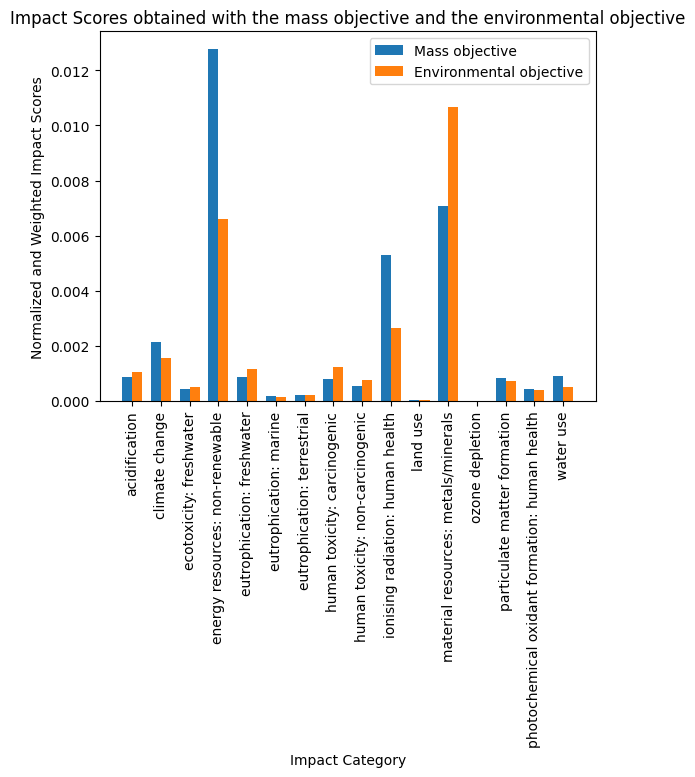

In [14]:
def impact_score(impact_category, M_core, M_copper, E_total):
    """
    Calculate the LCA score of the inductor for a given impact category.

    Parameters:
    - impact_category: str, the impact category for which to calculate the total impact score.
    - M_copper: float, the mass of copper in the inductor (kg)
    - M_core: float, the mass of ferrite in the inductor (kg)
    - E_total: float, the total energy losses (kWh)

    Returns:
    - normalized_score: float, the normalized impact score for the given impact category.
    """
    
    # impact for the requested impact category
    impact_score = (
        M_copper * df_copper[df_copper["Impact category"] == impact_category]["Impact Score"] +
        2*M_core * df_ferrite[df_ferrite["Impact category"] == impact_category]["Impact Score"] +
        E_total * df_electricity[df_electricity["Impact category"] == impact_category]["Impact Score"]
    )
    # Normalize then weight the score
    normalization_factor = normalization_factors_df[normalization_factors_df["Impact category"] == impact_category]["Normalization factor"].values[0]
    normalized_score = impact_score / normalization_factor
    weighting_factor = weighting_factors_df[weighting_factors_df["Impact category"] == impact_category]["Weighting factor"].values[0]
    weighted_score = normalized_score.values[0] * weighting_factor
    
    return weighted_score

    
# List of impact categories
impact_categories = result_df['Impact category'].unique()

# Impacts for the inductor with lowest mass
impacts_mass_obj = {category: impact_score(category, 2.88, 0.72, 841.951) for category in impact_categories}

# Impacts for the inductor with lowest single environmental score
impacts_eco_obj = {category: impact_score(category, 4.61, 1.16, 417.823) for category in impact_categories}

# Bar plot comparing the results
bar_width = 0.35
index = np.arange(len(impact_categories))
fig, ax = plt.subplots()
bar1 = ax.bar(index, impacts_mass_obj.values(), bar_width, label='Mass objective')
bar2 = ax.bar(index + bar_width, impacts_eco_obj.values(), bar_width, label='Environmental objective')

# Add labels, title, and legend
ax.set_xlabel('Impact Category')
ax.set_ylabel('Normalized and Weighted Impact Scores')
ax.set_title('Impact Scores obtained with the mass objective and the environmental objective')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(impact_categories)
ax.legend()
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

## Appendix

![LCA steps](https://raw.githubusercontent.com/SizingLab/sizing_course/main/laboratories/Lab-watt_project/assets/images/lca_steps.JPG)